<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/CapstoneProjectCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The goal of this process is to be able to leverage on the classification and regression algorithm to create models that can give upto 95 % score / prediction of the test data. this can assist to propose ideas on how to avoid the churn. e.g which problem code is a bigger causation to churn so that more of it can be focused. I am using a telco dataset.

#1.Importing the required libraries

In [1]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages for Statistical analysis
import pandas as pd
import numpy as np
#Import the necessary packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#2.Loading dataset

In [2]:
#Load the dataset
data= "/content/Telco_Churn_Data.csv"
data= pd.read_csv(data)
data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


# 3.Exploratory data Analysis

In [4]:

data.shape

(4708, 15)

In [42]:
#Identify Missing Values
data.isnull().values.any()

True

In [43]:
#Identify missing values
data.isnull().sum()

Target_Churn                       0
Target_Code                        0
Current_Bill_Amt                   0
Avg_Calls                          0
Avg_Calls_Weekdays                 0
Account_Age                        0
Percent_Increase_MOM               0
Acct_Plan_Subtype                  0
Complaint_Code                     0
Avg_Days_Delinquent                0
Current_TechSupComplaints          0
Current_Days_OpenWorkOrders        0
Equipment_Age                      0
Condition_of_Current_Handset       0
Avg_Hours_WorkOrderOpened          0
Target_Churn_Numeric            4708
dtype: int64

In [44]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened', 'Target_Churn_Numeric'],
      dtype='object')

In [48]:
# Check if the 'Target_Churn_Numeric' column exists in the data
if 'Target_Churn_Numeric' in data.columns:
    # Drop the 'Target_Churn_Numeric' column from the data
    data = data.drop("Target_Churn_Numeric", axis=1)
else:
    print("The 'Target_Churn_Numeric' column does not exist in the data.")
# Drop the 'Target_Churn_Numeric' column from the data and assign the result back to the data variable
data = data.drop("Target_Churn_Numeric", axis=1)



The 'Target_Churn_Numeric' column does not exist in the data.


KeyError: "['Target_Churn_Numeric'] not found in axis"

In [49]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened'],
      dtype='object')

In [50]:
data.drop("Target_Churn_Numeric", axis =1)

KeyError: "['Target_Churn_Numeric'] not found in axis"

In [51]:
data.isnull().sum()

Target_Churn                    0
Target_Code                     0
Current_Bill_Amt                0
Avg_Calls                       0
Avg_Calls_Weekdays              0
Account_Age                     0
Percent_Increase_MOM            0
Acct_Plan_Subtype               0
Complaint_Code                  0
Avg_Days_Delinquent             0
Current_TechSupComplaints       0
Current_Days_OpenWorkOrders     0
Equipment_Age                   0
Condition_of_Current_Handset    0
Avg_Hours_WorkOrderOpened       0
dtype: int64

Only two columns have missingness

In [6]:
#Identify uniqueness in the categorical columns
data["Complaint Code"].unique()

array(['Billing Problem', 'Moving', 'Check Account', 'Call Quality',
       'Inaccurate Sales Inf', nan, 'Pricing'], dtype=object)

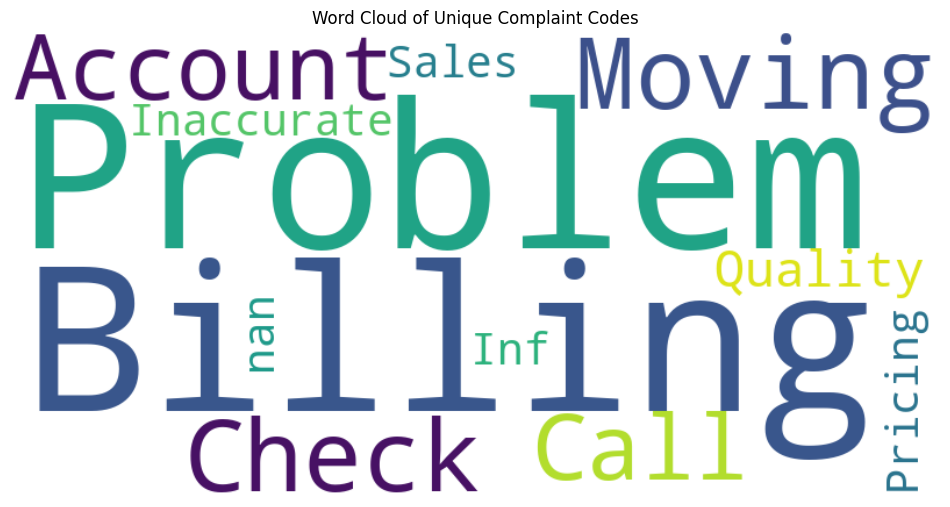

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the unique values from the "Complaint Code" column
unique_codes = data["Complaint Code"].unique()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(map(str, unique_codes)))

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Complaint Codes')
plt.show()


:Problems and Billings seems to be the most complains so far from this dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [9]:
data["Equipment Age"].describe()

count    4708.000000
mean       10.811810
std         8.710548
min         0.000000
25%         4.000000
50%         9.000000
75%        17.000000
max        39.000000
Name: Equipment Age, dtype: float64

In [10]:
data.columns=data.columns.str.replace(' ','_')

In [11]:
data.columns=data.columns.str.replace(' ','_')

In [12]:
# Fix typo in Avg_Hours_WorkOrderOpenned column
data['Avg_Hours_WorkOrderOpened'] = \
data['Avg_Hours_WorkOrderOpenned']
# Let's drop the older column (with typo)
data.drop(["Avg_Hours_WorkOrderOpenned"],axis=1,inplace=True)

In [13]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened'],
      dtype='object')

In [ ]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpened
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [14]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [15]:
#Change the data type of the Target_Code,
#Condition_of_Current_Handset, and Current_TechSupComplaints
#columns from continuous to the categorical object type

data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')
data['Current_TechSupComplaints']=\
data.Current_TechSupComplaints.astype('object')
data['Target_Code']=data.Target_Code.astype('int64')
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4701,4708,4264.0
unique,2,2,6,11,3.0
top,No Churn,Silver,Billing Problem,0,1.0
freq,2421,3914,2908,3589,4186.0


In [16]:
round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpened       0.00
dtype: float64

In [17]:
#Explore the complain code column
data.Complaint_Code.value_counts()

Complaint_Code
Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: count, dtype: int64

In [18]:
#Explore the condition of current handset column
data.Condition_of_Current_Handset.value_counts()

Condition_of_Current_Handset
1.0    4186
2.0      74
3.0       4
Name: count, dtype: int64

# 4.Data Cleaning

In [36]:
#Handling missingness

data['Complaint_Code']=data['Complaint_Code']\
                       .fillna(value='Billing Problem')
data['Condition_of_Current_Handset']=\
data['Condition_of_Current_Handset'].fillna(value=1)
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')


In [37]:
data.isnull().sum()

Target_Churn                       0
Target_Code                        0
Current_Bill_Amt                   0
Avg_Calls                          0
Avg_Calls_Weekdays                 0
Account_Age                        0
Percent_Increase_MOM               0
Acct_Plan_Subtype                  0
Complaint_Code                     0
Avg_Days_Delinquent                0
Current_TechSupComplaints          0
Current_Days_OpenWorkOrders        0
Equipment_Age                      0
Condition_of_Current_Handset       0
Avg_Hours_WorkOrderOpened          0
Target_Churn_Numeric            4708
dtype: int64

In [39]:
data.shape

(4708, 16)

In [20]:
#8. Perform data exploration by initially exploring the Target_Churn variable
data['Target_Churn'].value_counts(0)

Target_Churn
No Churn    2421
Churn       2287
Name: count, dtype: int64

In [21]:
data['Target_Churn'].value_counts(1)*100

Target_Churn
No Churn    51.42311
Churn       48.57689
Name: proportion, dtype: float64

In [22]:
# compare the data for churned customers versus those who haven't

data['Target_Churn_Numeric'] = data['Target_Churn'].str.extract('(\d+)', expand=False).astype(float)
summary_churn = data.groupby('Target_Churn_Numeric').mean()


# 5.Assessing Features using visualization and correlation

<Axes: >

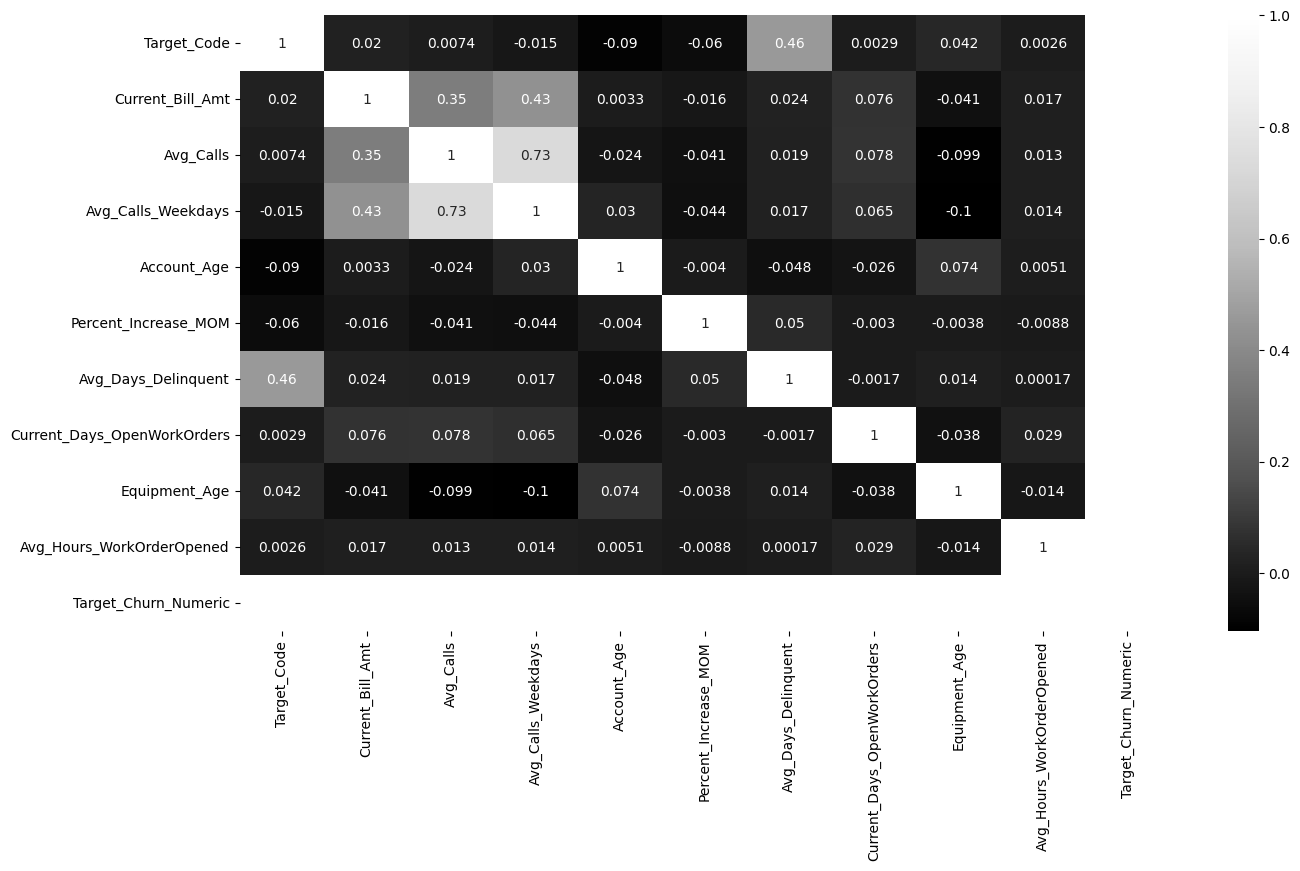

In [23]:
# # #.correlation among different variables
# # corr = data.corr()
# # plt.figure(figsize=(15,8))
# # sns.heatmap(corr, \
# #             xticklabels=corr.columns.values, \
# #  yticklabels=corr.columns.values,annot=True,\
# #  cmap='Greys_r')
# # corr
# data['Target_Churn'] = data['Target_Churn'].map({'No Churn': 0, 'Churn': 1})
# corr = data.corr()
# plt.figure(figsize=(15, 8))
# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='Greys_r')
# Create a copy of the original data
data_numeric = data.select_dtypes(exclude=['object'])

# Calculate correlation on numeric columns
corr = data_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='Greys_r')

Text(0, 0.5, 'No of Customers')

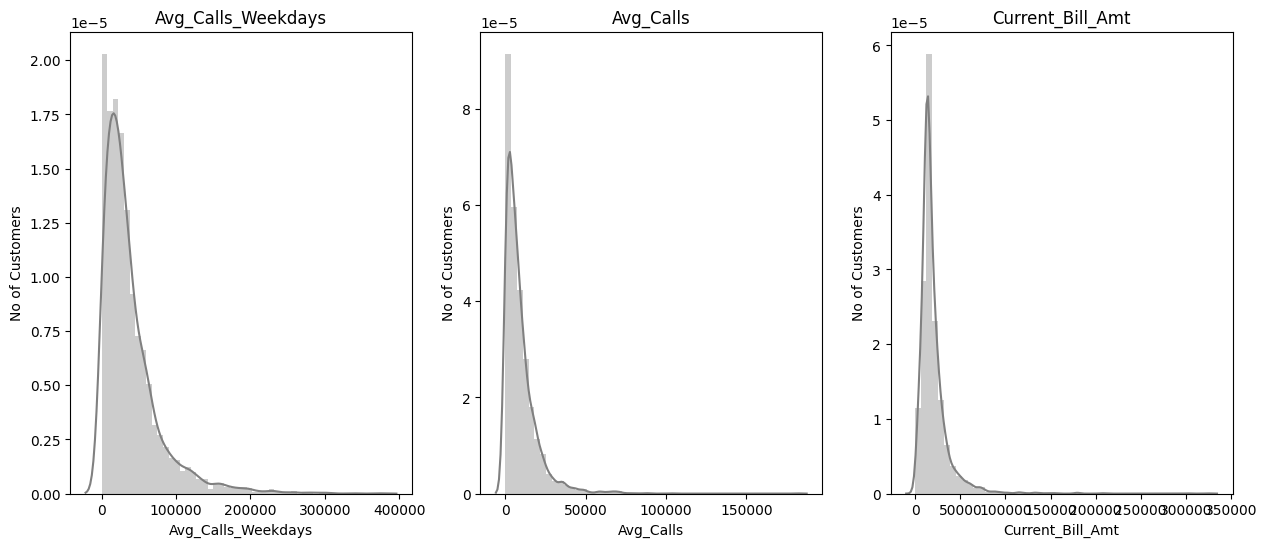

In [24]:
# univariate and bivariate analyses.
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.Avg_Calls_Weekdays, kde=True, \
 color="gray", \
             ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Avg_Calls, kde=True, color="gray", \
             ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Current_Bill_Amt, kde=True, color="gray", \
             ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

Avg Calls Weekdays, Avg_calls, and Current_Bill_Amnt, have a normal distribution and are skewed towards the left.

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

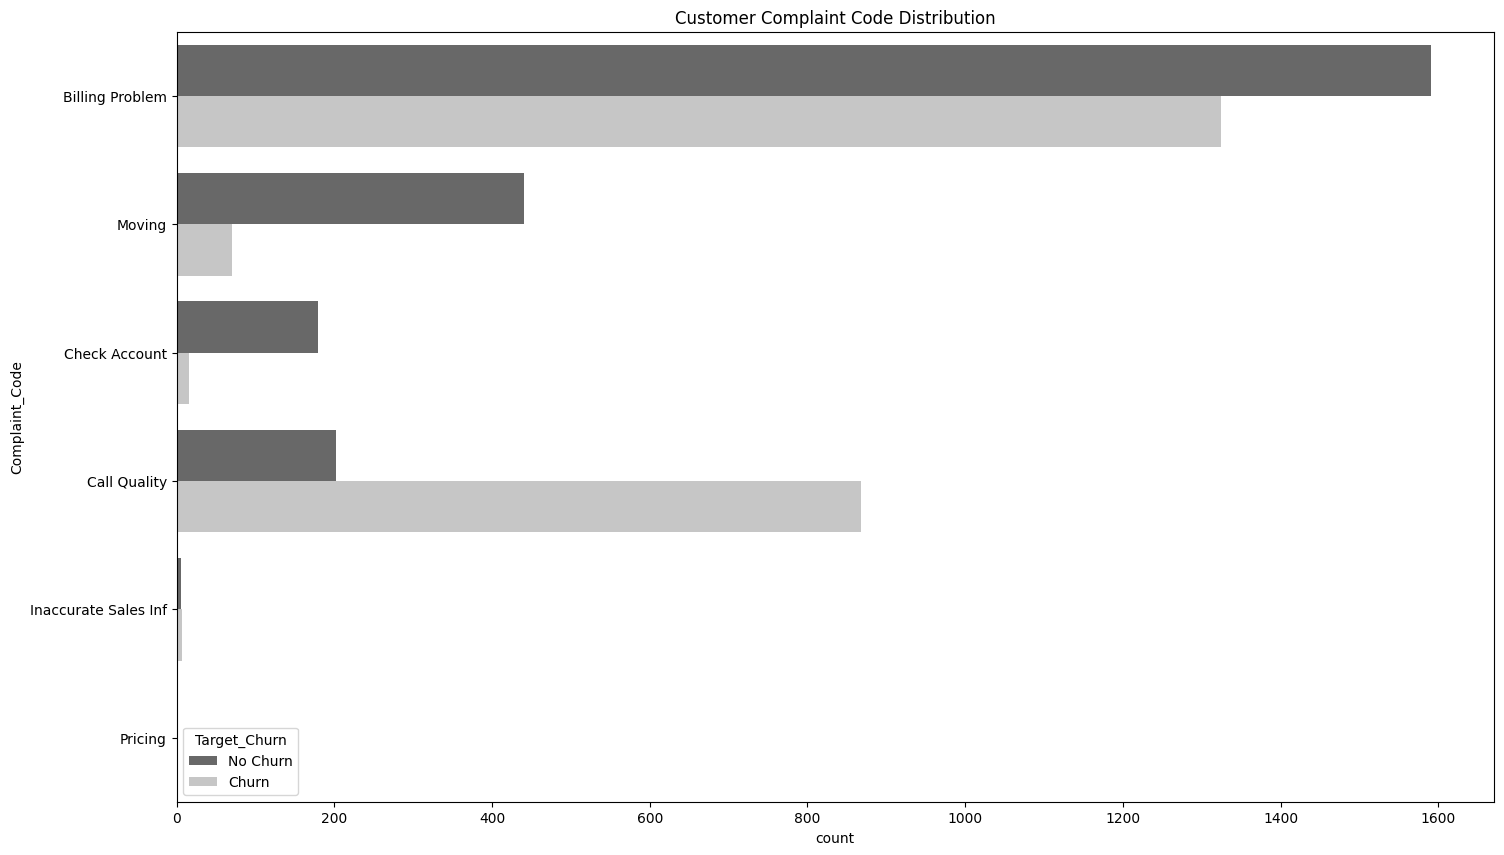

In [25]:
#Bivariate Analysis
plt.figure(figsize=(17,10))
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', \
 data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Complaint Code Distribution')

From the diagram, it is evident that call quality and billing problems are the two
main reasons for customer churn.


Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

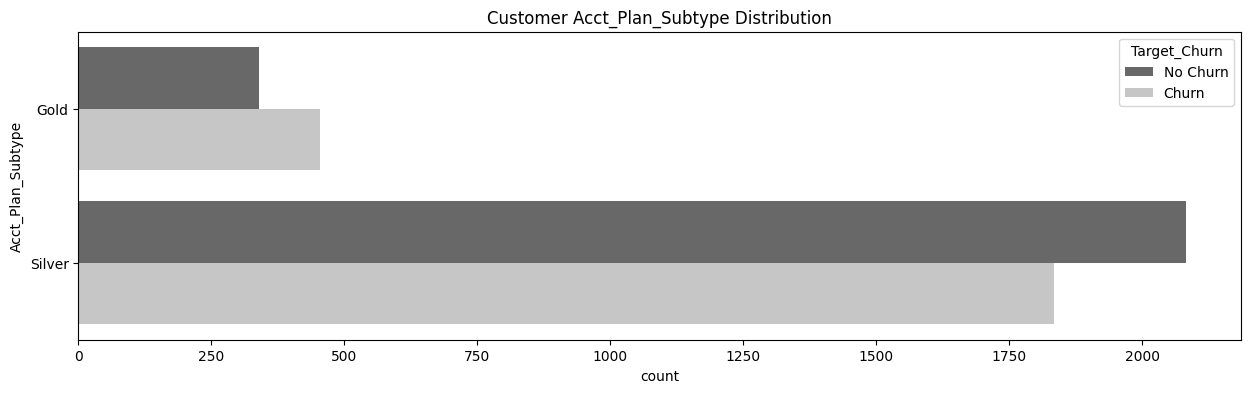

In [26]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', \
 data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Acct_Plan_Subtype Distribution')

from the diagram, a larger percentage of customers
from the gold plan have churned. This can be an indicator that the Gold plan
needs to be reviewed to understand why the customers are churning at a higher
rate with that plan

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

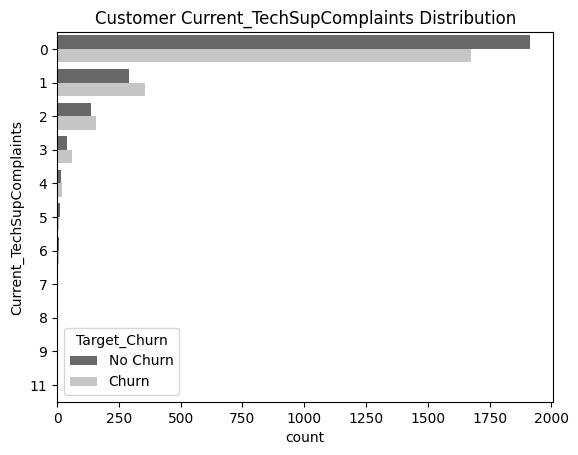

In [27]:
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', \
 data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution')

From the plot,  the No Churn count is
highest for zero tech complaints. Moreover, for all non-zero tech complaints, the
number of churned customers is higher than non-churned customers.

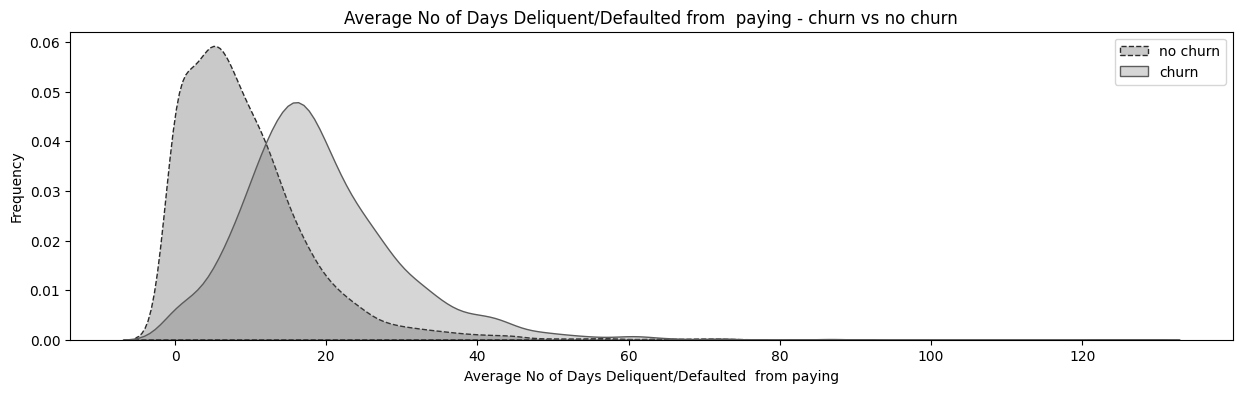

In [28]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Avg_Days_Delinquent'] , \
 color=sns.color_palette("Greys_r")[0],\
 shade=True,label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),\
 'Avg_Days_Delinquent'] , \
 color=sns.color_palette("Greys_r")[1],\
 shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaulted \
 from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaulted from \
 paying - churn vs no churn')
plt.legend()

From the plot, it can be observed that if the average number of days delinquent is
more than 16 days, customers start to churn.

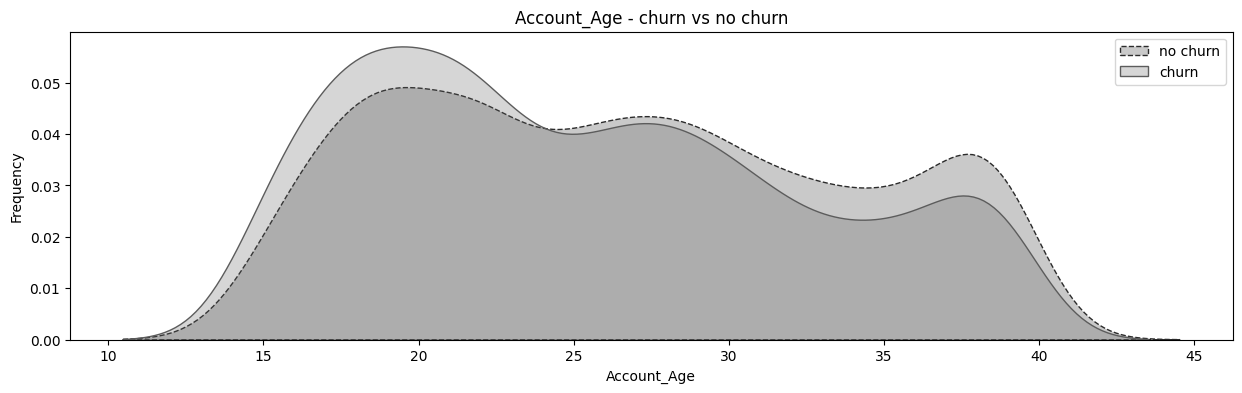

In [29]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Account_Age'], \
 color=sns.color_palette("Greys_r")[0], \
 shade=True,label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
 'Account_Age'], \
 color=sns.color_palette("Greys_r")[1] ,\
 shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()


It can be observed that, between, 15-20 days of opening an
account, the amount of customer churn increases; however, after 20 days, the
churn starts to reduce.

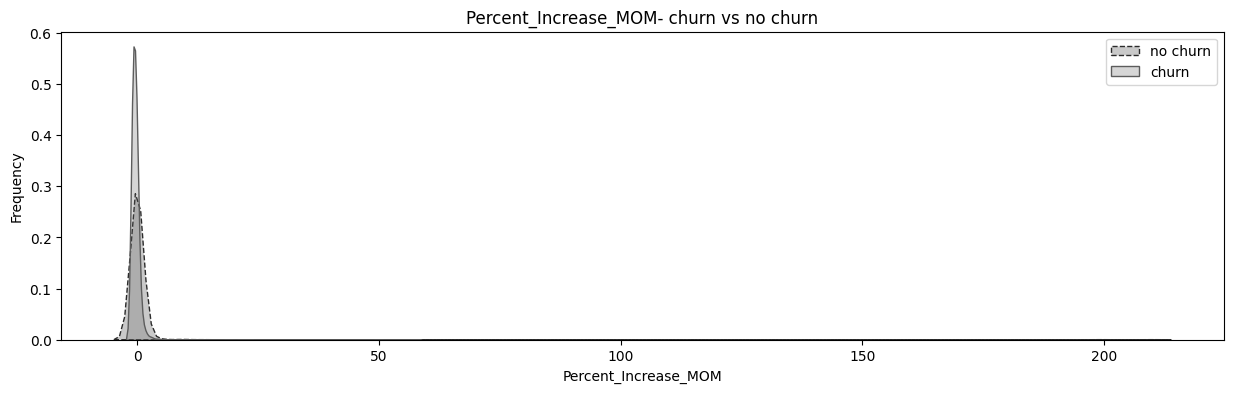

In [30]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Percent_Increase_MOM'], \
 color=sns.color_palette("Greys_r")[0], \
 shade=True, label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
 'Percent_Increase_MOM'], \
 color=sns.color_palette("Greys_r")[1], \
 shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend()


It can be observed from the plot that,customers who have
a Percent_Increase_MOM value between 0% to 10% are more likely
to churn

#6.Feature Engineering and Modelling

In [31]:
#Data modelling
#Feature selection using treebased feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [32]:

#Encode categorical variables using label encoding
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"]\
 .astype('category').cat.codes  #the cat.codes assigns numerical variables
data["Complaint_Code"] = data["Complaint_Code"]\
 .astype('category').cat.codes
data[["Acct_Plan_Subtype", "Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [53]:
data.isnull().sum()

Target_Churn                    0
Target_Code                     0
Current_Bill_Amt                0
Avg_Calls                       0
Avg_Calls_Weekdays              0
Account_Age                     0
Percent_Increase_MOM            0
Acct_Plan_Subtype               0
Complaint_Code                  0
Avg_Days_Delinquent             0
Current_TechSupComplaints       0
Current_Days_OpenWorkOrders     0
Equipment_Age                   0
Condition_of_Current_Handset    0
Avg_Hours_WorkOrderOpened       0
dtype: int64

In [52]:
#Split the data into training and testing sets
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, test_size=0.15, \
 random_state=123, stratify=y)

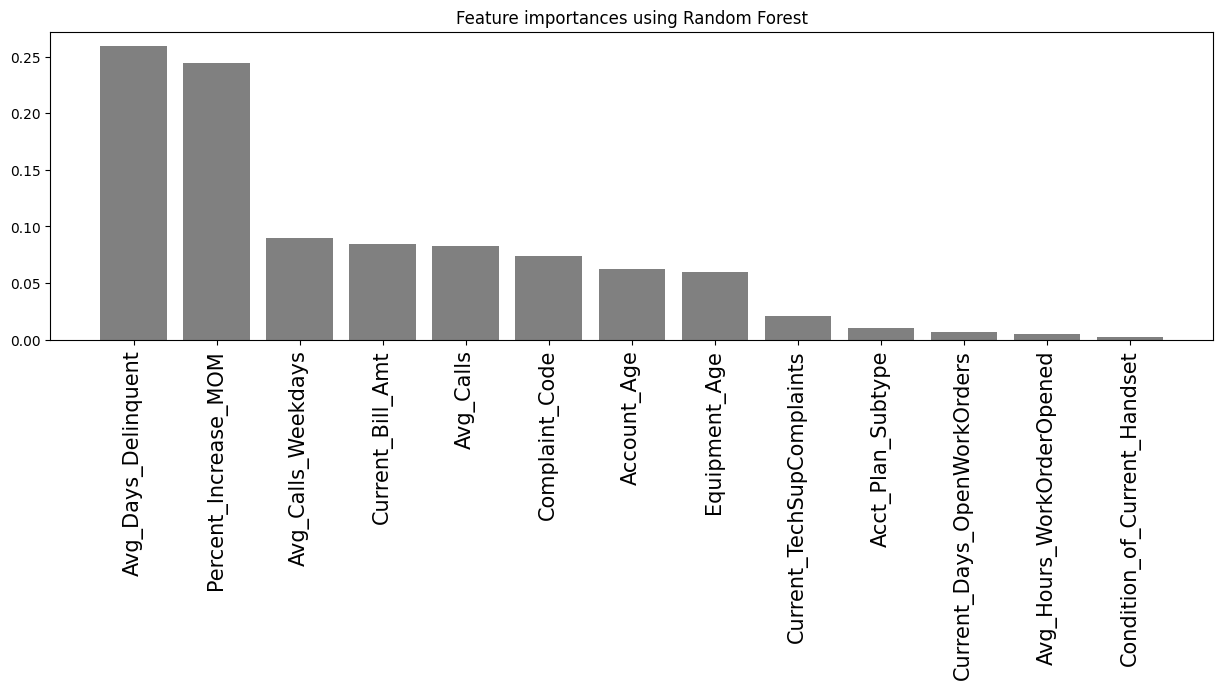

In [54]:
# Fit the model using the random forest classifier for feature selection
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1)\
 .columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],\
 color='gray', align='center')
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# # Import the necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier

# # Fit the random forest model
# forest = RandomForestClassifier(n_estimators=500, random_state=1)
# forest.fit(X_train, y_train)

# # Get the feature importances
# importances = forest.feature_importances_

# # Get the feature names
# features = data.drop(['Target_Code', 'Target_Churn'], axis=1).columns

# # Sort the feature importances in descending order
# sorted_indices = np.argsort(importances)[::-1]

# # Create a bar plot to visualize the feature importances
# plt.figure(figsize=(15, 4))
# plt.title("Feature Importances Using Random Forest")
# plt.bar(range(len(importances)), importances[sorted_indices], color='gray', align='center')
# plt.xticks(range(len(importances)), features[sorted_indices], rotation='vertical', fontsize=10)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.show()


In [55]:
# Import the statsmodels library and use it to fit a logistic regression model
# on the top seven features

import statsmodels.api as sm

top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',\
 'Avg_Calls_Weekdays','Current_Bill_Amt',\
 'Avg_Calls','Complaint_Code','Account_Age']
logReg = sm.Logit(y_train, X_train[top7_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [56]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

# Logistic regression

In [57]:
#Try Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs')\
               .fit(X_train[top7_features], y_train)
clf_logistic


LogisticRegression(random_state=0)

In [ ]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

This shows that the logistic regression model is getting an accuracy of 74.5% on the test data

# SVM

In [61]:
#Try Support Vector Mechanism
from sklearn import svm

In [62]:
# Scale the training and testing data using MInMax Scaler
# Import the necessary library
from sklearn.preprocessing import MinMaxScaler

# Scale the training data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train[top7_features])
X_train_svm = scaler.transform(X_train[top7_features])

# Scale the testing data using the same scaler
X_test_svm = scaler.transform(X_test[top7_features])


In [84]:
# Fit the SVM model
clf_svm = svm.SVC(kernel='poly', C=1)
clf_svm.fit(X_train_svm, y_train)


SVC(C=1, kernel='poly')

In [85]:
clf_svm.score(X_test_svm, y_test)

0.7977369165487977

This shows that the SVM classifier is performing better than the logistic
regression model.

# Decision Tree Classifier

In [73]:
#Try decision tree classifier
import sklearn.tree as tree


In [74]:
#Try decision tree classifier
from sklearn import tree
clf_decision = tree.DecisionTreeClassifier()
clf_decision.fit(X_train[top7_features],y_train)

clf_decision.score(X_test[top7_features], y_test)

0.7623762376237624

# Random Forest Classifier

In [76]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=20,  # Number of decision trees in the forest
    max_depth=None,   # No limit on the depth of the trees
    min_samples_split=7,  # Minimum number of samples required to split a node
    random_state=0        # Seed for the random number generator
)

# Train the Random Forest Classifier
rf_model.fit(X_train[top7_features], y_train)
#Score the model
rf_model.score(X_test[top7_features], y_test)

0.8104667609618105

# Fine tuning SVM to get a better score

In [79]:
#Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Scale the features
scaler = StandardScaler()
X_train_svm_scaled = scaler.fit_transform(X_train_svm)
X_test_svm_scaled = scaler.transform(X_test_svm)

# Select the top k features
selector = SelectKBest(f_classif, k=7)
X_train_svm_selected = selector.fit_transform(X_train_svm_scaled, y_train)
X_test_svm_selected = selector.transform(X_test_svm_scaled)


In [80]:
#Tuning  of the SVM hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# SVM classifier
svm_classifier = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_svm_selected, y_train)

# Get the best estimator
svm_classifier = grid_search.best_estimator_


In [81]:
# Evaluate the model on the test set and getscore
accuracy = svm_classifier.score(X_test_svm_selected, y_test)
print(f"SVM Classifier Accuracy: {accuracy:.2f}")


SVM Classifier Accuracy: 0.82


In [86]:
#E  xperimenting using bagging and boosting
from sklearn.ensemble import BaggingClassifier

# Create the bagging classifier with SVM as the base estimator
svm_bagging = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10)
svm_bagging.fit(X_train_svm_selected, y_train)

# Evaluate the bagging classifier on the test set
accuracy = svm_bagging.score(X_test_svm_selected, y_test)
print(f"SVM Bagging Classifier Accuracy: {accuracy:.2f}")


SVM Bagging Classifier Accuracy: 0.82


getting a better score of 0.82